In [609]:
import pandas as pd
import numpy as np
from math import log2

In [610]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)


In [611]:
dataSet.columns=dataSet.iloc[0]
dataSet=dataSet[1:].reset_index(drop=True)
dataSet

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95,360,3.5
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.5
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90,360,2.62
496,497,8,14.48,100000,79000,0.79,2,> 74,20,425000,315000,73.85,360,3
497,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
498,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


In [612]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [613]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [614]:
[~dataSet.columns.isin(["Age of Borrower"])]

[array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True])]

In [615]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [616]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [617]:
newDataSet[:5]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
1,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
2,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
3,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
4,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87


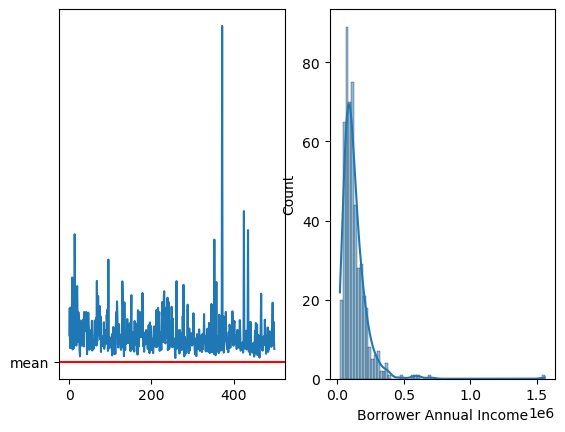

In [618]:
import matplotlib.pyplot as myplot
import seaborn as sns
fig,axes=myplot.subplots(1,2)
axes[0].plot(newDataSet["Borrower Annual Income"].values)
axes[0].axhline(y= 'mean', color='red')
#axes[1].hist(newDataSet["Borrower Annual Income"].values, bins='auto')
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto', ax=axes[1])
#newDataSet["Borrower Annual Income"].plot(kind='hist')
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Count'>

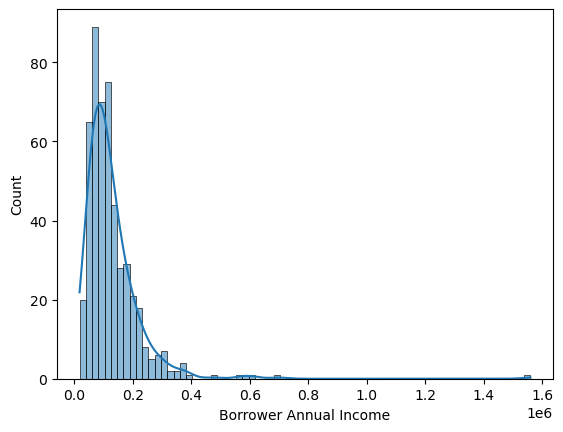

In [619]:
sns.histplot(newDataSet["Borrower Annual Income"],kde=True, bins='auto')

In [620]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
372,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58


In [621]:
summary=newDataSet["Borrower Annual Income"].agg(['mean', 'median', 'std'])
summary

mean      127626.000000
median    105500.000000
std       105177.424885
Name: Borrower Annual Income, dtype: float64

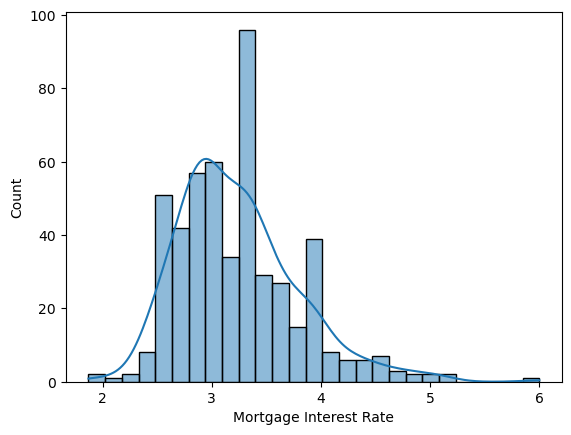

In [622]:
import seaborn as sns
sns.histplot(newDataSet['Mortgage Interest Rate'], bins='auto', kde=True)
myplot.show()

<Axes: xlabel='Borrower Annual Income', ylabel='Density'>

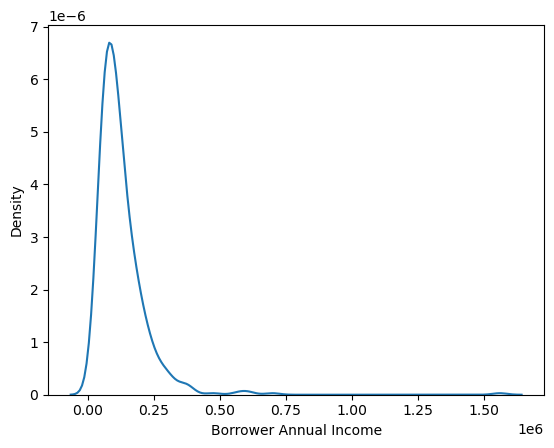

In [623]:
sns.kdeplot(newDataSet['Borrower Annual Income'], bw_adjust=0.9)

In [624]:
newDataSet[5:20]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
5,6,24,29.18,124900,255000,2.0416,2,< 25,20,905000,645000,71.44,360,2.86
6,7,8,81.63,100000,145000,1.4500,1,< 25,30,475000,395000,85.00,180,2.12
7,8,53,39.06,74600,392000,5.2547,2,< 25,20,265000,155000,60.00,360,2.99
8,9,36,98.09,96500,58000,0.6010,2,< 25,41,455000,185000,40.64,180,3.62
9,10,48,41.47,80000,170000,2.1250,2,< 25,20,535000,355000,65.60,180,2.37
10,11,34,40.18,96500,182000,1.8860,2,< 25,20,395000,305000,79.44,180,2.50
11,12,25,41.27,114000,64000,0.5614,2,< 25,44,465000,365000,80.00,360,4.62
12,13,6,84.75,127900,88000,0.6880,2,< 25,38,755000,385000,50.33,360,2.87
13,14,26,33.01,79700,593000,7.4404,2,< 25,20,545000,415000,75.00,360,4.75
14,15,6,34.80,127900,297000,2.3221,2,< 25,20,955000,765000,80.00,360,3.50


In [625]:
newDataSet["Borrower Annual Income"].agg(["mean","median"])

mean      127626.0
median    105500.0
Name: Borrower Annual Income, dtype: float64

In [626]:
value=newDataSet["Borrower Annual Income"].sort_values()[:499]
value.agg(["mean","median"])

mean      124755.511022
median    105000.000000
Name: Borrower Annual Income, dtype: float64

In [627]:
cat=pd.qcut(dataSet["Borrower Annual Income"],q=4)
print(cat)


0       (105500.0, 155250.0]
1      (155250.0, 1560000.0]
2       (17999.999, 69750.0]
3       (105500.0, 155250.0]
4       (105500.0, 155250.0]
               ...          
495    (155250.0, 1560000.0]
496      (69750.0, 105500.0]
497    (155250.0, 1560000.0]
498     (105500.0, 155250.0]
499     (17999.999, 69750.0]
Name: Borrower Annual Income, Length: 500, dtype: category
Categories (4, interval[float64, right]): [(17999.999, 69750.0] < (69750.0, 105500.0] < (105500.0, 155250.0] < (155250.0, 1560000.0]]


In [628]:
type(dataSet["Borrower Annual Income"])

pandas.core.series.Series

In [629]:
income_data=pd.concat([newDataSet["Borrower Annual Income"], cat], axis=1)
income_data.columns=["Income", "Category"]
income_data

,Income,Category
0,123000,"(105500.0, 155250.0]"
1,250000,"(155250.0, 1560000.0]"
2,64000,"(17999.999, 69750.0]"
3,141000,"(105500.0, 155250.0]"
4,109000,"(105500.0, 155250.0]"
...,...,...
495,275000,"(155250.0, 1560000.0]"
496,79000,"(69750.0, 105500.0]"
497,187000,"(155250.0, 1560000.0]"
498,109000,"(105500.0, 155250.0]"


In [630]:
grouped=income_data.groupby("Category")
grouped.groups.keys()

/var/folders/ck/bzg2z5s547d6mn01kk9k73280000gn/T/ipykernel_1065/1909285007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=income_data.groupby("Category")


dict_keys([Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')])

In [631]:
keys=grouped.groups.keys()
keys=list(keys)
print("list of keys", keys)
import numpy as np
keys=np.array(keys)
print('arrays', keys)
keys=keysArray.reshape((2,2))
keys

list of keys [Interval(17999.999, 69750.0, closed='right'), Interval(69750.0, 105500.0, closed='right'), Interval(105500.0, 155250.0, closed='right'), Interval(155250.0, 1560000.0, closed='right')]
arrays [Interval(17999.999, 69750.0, closed='right')
 Interval(69750.0, 105500.0, closed='right')
 Interval(105500.0, 155250.0, closed='right')
 Interval(155250.0, 1560000.0, closed='right')]


NameError: name 'keysArray' is not defined

In [ ]:
grouped.groups

In [ ]:
grouped.get_group(pd.Interval(17999.999, 69750.0, closed='right'))

In [ ]:
keys=keys.reshape((2,2))
print(keys)

In [ ]:
fig1,axes=myplot.subplots(2,2, figsize=(8,8))
print("THe axes object has", axes)
for index, plots in enumerate(axes):
    print("outer array is ", index)
    for i,plotN in enumerate(plots):
        print("THe index of inner array is ", i)
        sns.histplot(grouped.get_group(keys[index,i]), ax=axes[index,i], label=f'group{index,i}', kde=True)
        myplot.legend()
myplot.show()

In [ ]:
first_group=grouped.get_group(keys[0,0])
second_group=grouped.get_group(keys[0,1])
third_group=grouped.get_group(keys[1,0])
fourth_group=grouped.get_group(keys[1,1])
print('the min of 1st group is', first_group.min(), 'the max is ', first_group.max(),'\n')
print('the min of 1st group is', second_group.min(), 'the max is ', second_group.max(),'\n')
print('the min of 1st group is', third_group.min(), 'the max is ', third_group.max(),'\n')
print('the min of 1st group is', fourth_group.min(), 'the max is ', fourth_group.max(),'\n')


In [ ]:
import math
#math.sqrt(first_group.var())

In [ ]:
pd.DataFrame(first_group).info()

In [ ]:
first_group
#first_group=first_group.astype(float)

In [ ]:
emperical_stats=first_group.describe()
emperical_stats

In [ ]:
#fourth_group=fourth_group.astype(float)
#fourth_group.describe()

In [ ]:
cv_first_group=first_group["Income"].std()/first_group["Income"].mean() *100
cv_first_group

In [ ]:
#23% of variation in group is not desriable <10% is okay to consisder homogenousness .

In [ ]:
sns.histplot(income_data["Income"],bins=100)
myplot.xlim(0,400000)

In [ ]:
dataSet[dataSet["Borrower Annual Income"]<80000]

In [ ]:
# 3:- Let the journey Begin 

In [ ]:
# let us use the regression model to see the best attributes
dataSet.columns


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income", "Age of Borrower"],axis=1)
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)
plot_tree(model)
myplot.show()



In [ ]:
X_train[:2]

In [ ]:
from sklearn.tree import export_text
tree_rules= export_text(model, feature_names=X_train.columns)


In [ ]:
#X_train.groupby("Borrower Income Ratio").groups

In [ ]:
X_train

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=4,
    random_state=42
)

print(X_train)
model.fit(X_train, y_train)


In [ ]:
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet[["Borrower Income Ratio", "LTV Ratio"]]
y=dataSet["Borrower Annual Income"]
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=1,
    random_state=42
)


model.fit(X_train, y_train)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Annual Income","Age of Borrower"], axis=1)
y=dataSet["Borrower Annual Income"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)


In [ ]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[feature>3.88]
right_tree=target[(feature>2.79) & (feature<=3.88)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

In [ ]:
target=dataSet["Borrower Annual Income"]
feature=dataSet["Borrower Income Ratio"]
left_tree=target[(feature>1.49) & (feature<=1.91)]
right_tree=target[(feature>1.91) & (feature<=2.79)]
print(right_tree[:5])
print("The length of right tree is ", len(right_tree))
print("The length of left tree is ", len(left_tree))
print("the mean", left_tree.mean())
print("the mean", right_tree.mean())
print("The left Variance is ",left_tree.var())
print("The right Variance is ",right_tree.var())
print("The parent variance is ", target.var())

In [ ]:
v_parent=target.var()

In [ ]:
right_tree_var=(22/36)*right_tree.var()

right_tree_var

In [ ]:
left_tree_var=(14/36)* left_tree.var()
left_tree_var

In [ ]:
v_red_perc=( v_parent- (right_tree_var + left_tree_var) ) / v_parent
v_red_perc

In [ ]:
# The above number does not make sense without calculating the variance percentange reduction
# v_reduced= (v_parent - v_after)/ v_parent
v_parent=target.var()
v_after= (176/380 * right_tree.var() )+ (204/380 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

In [ ]:
v_parent=target.var()
v_after= (85/115 * right_tree.var() )+ (30/115 * left_tree.var())
v_reduced= (v_parent - v_after) / v_parent
v_reduced *100 

In [ ]:
new_data=dataSet[dataSet["Borrower Income Ratio" ]>  3.88][["Borrower Income Ratio","Borrower Annual Income"]]

In [ ]:
new_data

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X=dataSet.drop(["Borrower Income Ratio","Age of Borrower","Borrower Annual Income"], axis=1)
y=dataSet["Borrower Income Ratio"]

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.0001, random_state=42)
print(X_train.columns)

model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=3,
    random_state=42,
    min_samples_leaf=15
)


model.fit(X, y)
plot_tree(model)
myplot.show()
rules=export_text(model, feature_names=X_train.columns)
print(rules)

In [ ]:
data_for_clustering=dataSet.drop(["Age of Borrower"], axis=1)
data_for_clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_for_clustering)
data_for_clustering['cluster']=kmeans.labels_
data_for_clustering

In [ ]:
clusters=data_for_clustering.groupby(by="cluster")
clusters.groups

In [ ]:
first_cluster=clusters.get_group(0)
first_cluster


In [ ]:
second_cluster=clusters.get_group(1)
second_cluster



In [ ]:
third_cluster=clusters.get_group(2)
print(third_cluster.shape)
third_cluster



In [ ]:
kmeans.cluster_centers_

In [ ]:
data_for_clustering.groupby(by="cluster").mean()

In [ ]:
from sklearn.cluster import KMeans
new_data_for_cluster=dataSet.drop(["Borrower ID Number","Age of Borrower"], axis=1)
new_kmeans=KMeans( random_state=42)
new_kmeans.fit(new_data_for_cluster)
new_kmeans.cluster_centers_

new_data_for_cluster["clusters"]=new_kmeans.labels_
new_kmeans.n_clusters

In [ ]:
new_data_for_cluster.groupby("clusters").mean()

In [ ]:
first=new_data_for_cluster.groupby(by='clusters').get_group(0)
first

In [ ]:
import seaborn as sns
sns.lineplot(first["Borrower Income Ratio"].sort_values())

In [ ]:
a=first["Borrower Income Ratio"].sort_values().reset_index(drop=True)
a

In [ ]:
sns.histplot(first["Borrower Income Ratio"].sort_values().reset_index(drop=True), kde=True)

In [ ]:
sns.histplot(dataSet["Borrower Income Ratio"].sort_values().reset_index(drop=True) )

In [ ]:
sns.histplot(new_data_for_cluster.groupby(by='clusters').get_group(1)["Borrower Income Ratio"].reset_index(drop=True),kde= True)

In [ ]:
for i in range(10):
    print(i)

In [ ]:
new_data_for_cluster

In [ ]:
data_for_clustering.columns

In [644]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia1=[]
K =range(1,16)
data1=data_for_clustering.drop(["Borrower ID Number","cluster"], axis=1)
for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia1.append(kmean.inertia_)
print(inertia1)

[47312717685094.91, 20896510790715.75, 14788264678769.586, 11619334556573.71, 9923323381875.764, 7907111676019.516, 6903265895777.26, 6196289702447.646, 5844405088551.535, 5474593972506.455, 4663863256292.891, 4372300641685.2666, 4052695682359.914, 3820762120173.2993, 3661640118556.379]


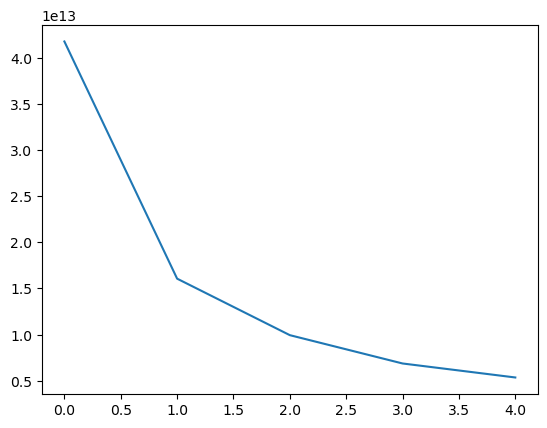

In [645]:
myplot.plot(pd.Series(inertia))

In [646]:
pd.Series(inertia)

0    4.179263e+13
1    1.606114e+13
2    9.931559e+12
3    6.859196e+12
4    5.341028e+12
dtype: float64

In [647]:
# NOw let us use elbow(inertia) to find the best value of K
from sklearn.cluster import KMeans
inertia=[]

K =range(1,6)

for k in K:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(data1)
    inertia.append(kmean.inertia_)
print(inertia)
clusters=kmean.labels_

print(len(clusters))
k_five_means_data_set=data1
k_five_means_data_set["Cluster"]=clusters
k_five_means_data_set

[47312717685094.91, 20896510790715.75, 14788264678769.586, 11619334556573.71, 9923323381875.764]
500


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
1,6,90.76,83300,250000,3.0012,2,30,535000,505000,95,360,3.5,4
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
3,51,34.58,124900,141000,1.1289,2,46,665000,345000,51.51,180,2.25,4
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,40.28,80100,275000,3.4332,2,20,755000,505000,90,360,2.62,1
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0
497,17,10.96,69300,187000,2.6984,2,10,325000,145000,43.75,180,2.87,2
498,26,33.82,79700,109000,1.3676,2,20,525000,385000,73.46,360,3.62,4


In [648]:
# Now the task comes of cross checking these clusters(k=5) with the help of scatterplot where we will use PCA

In [649]:
k_five_means_data_set["Cluster"].value_counts()

Cluster
2    182
0    164
4     96
1     47
3     11
Name: count, dtype: int64

In [650]:
k=k_five_means_data_set
k[k["Cluster"]==1]

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
14,6,34.8,127900,297000,2.3221,2,20,955000,765000,80,360,3.5,1
19,6,65.52,75000,352000,4.6933,2,30,755000,505000,68,360,4.12,1
29,41,13.88,72200,171000,2.3684,2,48,715000,515000,71.78,360,2.87,1
62,6,29.96,83300,192000,2.3049,2,20,965000,585000,60.2,360,3.37,1
70,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
72,53,24.46,106900,124000,1.16,2,30,865000,495000,57.66,360,3.5,1
76,6,59.79,83300,212000,2.545,2,20,835000,545000,65.62,360,3.5,1
78,53,21.32,106900,115000,1.0758,2,42,955000,485000,56.1,360,3.37,1


In [651]:
len(dataSet.columns)

14

In [652]:
len(data1.columns)

13

In [653]:
kmean.cluster_centers_

array([[2.74817073e+01, 2.70219512e+01, 8.43640244e+04, 1.18506098e+05,
        1.44848415e+00, 1.86585366e+00, 3.05975610e+01, 3.83475610e+05,
        2.79512195e+05, 7.46549390e+01, 3.21951220e+02, 3.19628049e+00],
       [1.81276596e+01, 4.17059574e+01, 9.84914894e+04, 1.73382979e+05,
        1.83679574e+00, 2.00000000e+00, 2.94042553e+01, 8.45851064e+05,
        4.98829787e+05, 6.08987234e+01, 3.42127660e+02, 3.14723404e+00],
       [2.78406593e+01, 2.39395604e+01, 7.91824176e+04, 8.71593407e+04,
        1.12639835e+00, 1.85164835e+00, 3.00219780e+01, 2.27252747e+05,
        1.57582418e+05, 7.24610989e+01, 3.17142857e+02, 3.35307692e+00],
       [1.78181818e+01, 2.97318182e+01, 9.30818182e+04, 2.09090909e+05,
        2.28869091e+00, 1.81818182e+00, 3.15454545e+01, 1.39681818e+06,
        5.75000000e+05, 4.40090909e+01, 3.10909091e+02, 2.99727273e+00],
       [2.19895833e+01, 3.21165625e+01, 9.11479167e+04, 1.88187500e+05,
        2.18560104e+00, 1.94791667e+00, 3.05937500e+01, 6.04

In [654]:
len(data1.columns)

13

In [655]:
k["Cluster"].value_counts()

Cluster
2    182
0    164
4     96
1     47
3     11
Name: count, dtype: int64

In [656]:
k_group=k.groupby(by="Cluster")
print(k_group.groups.keys())

dict_keys([0, 1, 2, 3, 4])


In [657]:
first_cluster=k_group.get_group(0)
first_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75,0
4,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87,0
8,36,98.09,96500,58000,0.601,2,41,455000,185000,40.64,180,3.62,0
10,34,40.18,96500,182000,1.886,2,20,395000,305000,79.44,180,2.5,0
11,25,41.27,114000,64000,0.5614,2,44,465000,365000,80,360,4.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,22,31.96,54400,62000,1.1397,2,45,355000,285000,79.63,360,2.75,0
491,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62,0
493,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75,0
496,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3,0


In [658]:
second_cluster=k_group.get_group(1)
print(second_cluster.shape)
second_cluster

(47, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
5,24,29.18,124900,255000,2.0416,2,20,905000,645000,71.44,360,2.86,1
12,6,84.75,127900,88000,0.688,2,38,755000,385000,50.33,360,2.87,1
14,6,34.8,127900,297000,2.3221,2,20,955000,765000,80,360,3.5,1
19,6,65.52,75000,352000,4.6933,2,30,755000,505000,68,360,4.12,1
29,41,13.88,72200,171000,2.3684,2,48,715000,515000,71.78,360,2.87,1
62,6,29.96,83300,192000,2.3049,2,20,965000,585000,60.2,360,3.37,1
70,6,35.67,83300,306000,3.6735,2,10,835000,535000,64.81,360,3.25,1
72,53,24.46,106900,124000,1.16,2,30,865000,495000,57.66,360,3.5,1
76,6,59.79,83300,212000,2.545,2,20,835000,545000,65.62,360,3.5,1
78,53,21.32,106900,115000,1.0758,2,42,955000,485000,56.1,360,3.37,1


In [659]:
third_cluster=k_group.get_group(2)
print(third_cluster.shape)
third_cluster

(182, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
2,34,64.19,96500,64000,0.6632,2,43,375000,105000,28.55,180,2.5,2
7,53,39.06,74600,392000,5.2547,2,20,265000,155000,60,360,2.99,2
17,13,53.46,52400,76000,1.4504,2,42,255000,145000,58.39,180,3.5,2
20,48,30.74,84800,229000,2.7005,2,30,215000,155000,74.95,360,3.62,2
25,26,8.94,79000,54000,0.6835,2,43,295000,235000,80,360,3.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,48,55.38,80000,38000,0.475,1,30,135000,115000,95,360,3.99,2
481,26,16.59,79700,108000,1.3551,2,10,185000,125000,68.1,180,2.75,2
487,51,27.59,89400,90000,1.0067,2,43,225000,165000,73.68,360,3,2
489,26,40.65,101500,75000,0.7389,2,45,265000,245000,94.82,360,3.37,2


In [660]:
fourth_cluster=k_group.get_group(3)
print(fourth_cluster.shape)
fourth_cluster

(11, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,3
131,6,24.95,97800,222000,2.2699,1,20,1105000,715000,64.81,360,3,3
231,6,32.62,127900,328000,2.5645,2,20,1915000,715000,37.38,240,2.5,3
235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,3
261,39,17.14,84600,375000,4.4326,2,37,1505000,515000,34.02,360,3,3
334,37,8.04,80100,124000,1.5481,2,38,1605000,515000,31.9,360,2.5,3
369,6,25.17,127900,117000,0.9148,2,38,1215000,395000,32.23,240,3,3
381,20,11.96,85900,232000,2.7008,2,36,1155000,515000,44.38,240,3.5,3
410,6,63.85,83300,126000,1.5126,1,44,1265000,655000,57.11,360,2.99,3
457,6,28.31,83300,174000,2.0888,2,44,1445000,725000,50.45,360,3.87,3


In [661]:
fifth_cluster=k_group.get_group(3)
print(fifth_cluster.shape)
fifth_cluster

(11, 13)


,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate,Cluster
114,17,12.95,89100,231000,2.5926,2,20,1465000,505000,34.95,360,2.99,3
131,6,24.95,97800,222000,2.2699,1,20,1105000,715000,64.81,360,3,3
231,6,32.62,127900,328000,2.5645,2,20,1915000,715000,37.38,240,2.5,3
235,47,7.21,80700,251000,3.1103,2,10,1425000,405000,28.34,180,2.62,3
261,39,17.14,84600,375000,4.4326,2,37,1505000,515000,34.02,360,3,3
334,37,8.04,80100,124000,1.5481,2,38,1605000,515000,31.9,360,2.5,3
369,6,25.17,127900,117000,0.9148,2,38,1215000,395000,32.23,240,3,3
381,20,11.96,85900,232000,2.7008,2,36,1155000,515000,44.38,240,3.5,3
410,6,63.85,83300,126000,1.5126,1,44,1265000,655000,57.11,360,2.99,3
457,6,28.31,83300,174000,2.0888,2,44,1445000,725000,50.45,360,3.87,3


In [662]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_for_pca=k_five_means_data_set.drop("Cluster", axis=1)
data_for_pca["Borrower Annual Income"]=dataSet["Borrower Annual Income"]
scalerd_data=scaler.fit_transform(data_for_pca)


In [669]:
from sklearn.decomposition import PCA
pca= PCA(n_components=5)
scalered_data_pca=pca.fit_transform(scalerd_data)


In [670]:

pca.components_

array([[-0.13885604,  0.13698082,  0.22332004,  0.45619587,  0.39996485,
         0.14881843, -0.14651136,  0.49085175,  0.45569953, -0.19083105,
        -0.03262311, -0.11960808],
       [ 0.16483454, -0.26100335, -0.36634934,  0.42389561,  0.49540449,
        -0.04552549, -0.38573437, -0.3076795 , -0.23765883,  0.16713647,
        -0.0734523 ,  0.10020022],
       [-0.11394919,  0.1358409 , -0.00555402,  0.0891784 ,  0.08747413,
        -0.30733204,  0.15432796, -0.00591636,  0.27417004,  0.52300435,
         0.59565846,  0.36209198],
       [ 0.69359331, -0.46778196,  0.38115786,  0.01769588, -0.0678096 ,
        -0.15615993,  0.02811653,  0.09481131,  0.19131611,  0.18660747,
         0.03735713, -0.20719643],
       [ 0.22460554, -0.18899711,  0.04931124,  0.04296288,  0.0348809 ,
         0.62812961,  0.2208677 ,  0.02743592, -0.06515986, -0.24057788,
         0.22231412,  0.59389325]])

In [671]:
pca.components_

array([[-0.13885604,  0.13698082,  0.22332004,  0.45619587,  0.39996485,
         0.14881843, -0.14651136,  0.49085175,  0.45569953, -0.19083105,
        -0.03262311, -0.11960808],
       [ 0.16483454, -0.26100335, -0.36634934,  0.42389561,  0.49540449,
        -0.04552549, -0.38573437, -0.3076795 , -0.23765883,  0.16713647,
        -0.0734523 ,  0.10020022],
       [-0.11394919,  0.1358409 , -0.00555402,  0.0891784 ,  0.08747413,
        -0.30733204,  0.15432796, -0.00591636,  0.27417004,  0.52300435,
         0.59565846,  0.36209198],
       [ 0.69359331, -0.46778196,  0.38115786,  0.01769588, -0.0678096 ,
        -0.15615993,  0.02811653,  0.09481131,  0.19131611,  0.18660747,
         0.03735713, -0.20719643],
       [ 0.22460554, -0.18899711,  0.04931124,  0.04296288,  0.0348809 ,
         0.62812961,  0.2208677 ,  0.02743592, -0.06515986, -0.24057788,
         0.22231412,  0.59389325]])

In [672]:
pca.explained_variance_ratio_

array([0.22949195, 0.15908608, 0.14374831, 0.09351133, 0.09190714])

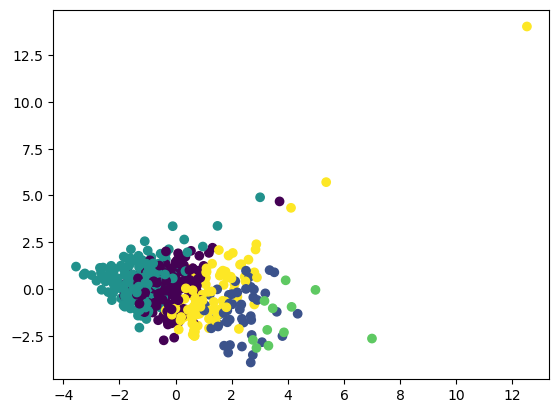

In [673]:
myplot.scatter(scalered_data_pca[:,0], scalered_data_pca[:,1], c=kmean.labels_)

In [674]:
k_first_cluster=first_cluster.drop("Cluster",axis=1).reset_index(drop=True)
k_first_cluster

,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
0,53,29.57,91700,123000,1.3413,2,10,385000,195000,50.65,360,2.75
1,39,17.93,84600,109000,1.2884,1,30,405000,325000,80,180,2.87
2,36,98.09,96500,58000,0.601,2,41,455000,185000,40.64,180,3.62
3,34,40.18,96500,182000,1.886,2,20,395000,305000,79.44,180,2.5
4,25,41.27,114000,64000,0.5614,2,44,465000,365000,80,360,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...
159,22,31.96,54400,62000,1.1397,2,45,355000,285000,79.63,360,2.75
160,37,25.24,94100,95000,1.0096,1,30,405000,345000,85.91,360,2.62
161,4,17.66,77800,104000,1.3368,2,10,475000,205000,43.28,180,2.75
162,8,14.48,100000,79000,0.79,2,20,425000,315000,73.85,360,3


In [643]:
k_first_cluster.columns

Index(['Wide Area Location Code', '% Minority in Local Area',
       'Median Family Income in Local Area', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Borrower Debt to Income Ratio',
       'Appraised Value of Home', 'Amount Borrowed', 'LTV Ratio',
       'Length of Mortgage in Months', 'Mortgage Interest Rate'],
      dtype='object', name=0)

In [675]:
k_first_cluster["Borrower Annual Income"]/k_first_cluster["Amount Borrowed"]

0      0.630769
1      0.335385
2      0.313514
3      0.596721
4      0.175342
         ...   
159    0.217544
160    0.275362
161    0.507317
162    0.250794
163    0.196721
Length: 164, dtype: object